In [1]:
#import the dependendencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#file to import
file1 = 'raw_data/city_data.csv'
file2 = 'raw_data/ride_data.csv'

In [3]:
#importing the files and creting dataframes
city_data_df = pd.read_csv(file1)
ride_data_df = pd.read_csv(file2)
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
#merging the two data frame in order to create a unique one with all information --> unique_key = city
complete_df = ride_data_df.merge(city_data_df, on='city', how='left')
complete_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


# Bubble Plot of Ride Sharing Data

In [5]:
#calculating the following information: Average Fare ($) Per City, Total Number of Rides Per City, Total Number of Drivers Per City, City Type (Urban, Suburban, Rural)

#creating three different dataframes per city type urban,suburban and rural
urban_data = complete_df.loc[complete_df['type']=='Urban']
suburban_data = complete_df.loc[complete_df['type']=='Suburban']
rural_data = complete_df.loc[complete_df['type']=='Rural']

#calculating the total revenue per city
urban_revenue = urban_data.groupby("city").sum()['fare']
suburban_revenue = suburban_data.groupby("city").sum()['fare']
rural_revenue = rural_data.groupby("city").sum()['fare']

#calculating total number of rides per city
urban_rides = urban_data.groupby("city").count()['ride_id']
suburban_rides = suburban_data.groupby("city").count()['ride_id']
rural_rides = rural_data.groupby("city").count()['ride_id']

#calculating the avg fare per city by dividing the total revenue per the amount of total rides
urban_avg_fare = round(urban_revenue/urban_rides,2)
suburban_avg_fare = round(suburban_revenue/suburban_rides,2)
rural_avg_fare = round(rural_revenue/rural_rides,2)

#calculating total # of drivers per city and dropping duplicates per city
urban_drivers = urban_data.drop_duplicates('city').set_index('city')['driver_count']
suburban_drivers = suburban_data.drop_duplicates('city').set_index('city')['driver_count']
rural_drivers = rural_data.drop_duplicates('city').set_index('city')['driver_count']

In [6]:
#creating a scatter graph per city type urban, suburban, rural as per pdf 
plt.scatter(urban_rides, urban_avg_fare, marker='o', facecolors='lightcoral', edgecolors='black', s=urban_drivers*10, 
            alpha=0.75, label='Urban')

plt.scatter(suburban_rides, suburban_avg_fare, marker='o', facecolors='lightblue', edgecolors='black', s=suburban_drivers*10, 
            alpha=0.75, label='Suburban')

plt.scatter(rural_rides, rural_avg_fare, marker='o', facecolors='yellow', edgecolors='black', s=rural_drivers*10, alpha=0.75, 
            label='Rural')

In [7]:
#adding labels to the plot
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($) per city")

Text(0,0.5,'Average Fare ($) per city')

In [8]:
#plot limits
plt.xlim(0,35)
plt.ylim(15,55)

(15, 55)

In [9]:
#adding a grid to the plot
plt.grid()

In [10]:
#adding a legend to the plot
lgnd = plt.legend(scatterpoints=1)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

plt.annotate(s='Note:\nCircle size correlates with driver count per city', xy=(0,15), xytext=(37,45))

Text(37,45,'Note:\nCircle size correlates with driver count per city')

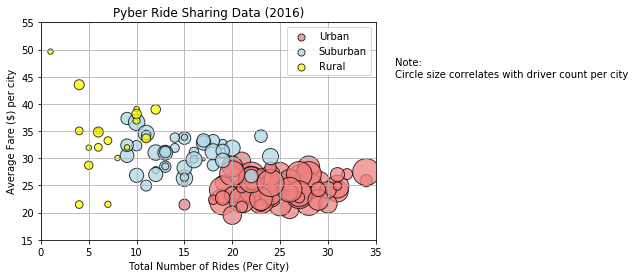

In [11]:
plt.show()

# Total Fares by City Type

In [12]:
#calculating the total revenue indenpendently by the city
total_fare = complete_df['fare'].sum()

#calculating the total revenue per city type urban, uburban and rural
type_fares = complete_df.groupby('type').sum()['fare']

#calculating the % of revenue per city type
percents_fares = (type_fares/total_fare)

#formatting the pie chart by creating labels, determining the size, colors and exploding
labels = percents_fares.index
sizes = percents_fares
colors = ['yellow', 'lightblue', 'red']
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

Text(0.5,1,'% of Total Fares by City Type')

In [13]:
plt.axis("equal")

(-1.1176639226730507,
 1.1945670777444062,
 -1.1162114572424728,
 1.1625457019480223)

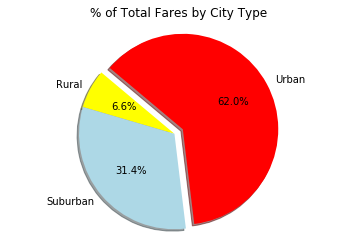

In [14]:
plt.show()

# Total Rides by City Type

In [15]:
#calculating the total # of rides indenpendently by the city
total_rides = complete_df['fare'].count()

#calculating the total # of rides per city type urban, uburban and rural
rides_type = complete_df.groupby('type').count()['ride_id']

#calculating the % of rides per city type
percent_rides = (rides_type/total_rides)

#formatting the pie chart by creating labels, determining the size, colors and exploding
labels = percent_rides.index
sizes = percent_rides
colors = ['yellow', 'lightblue', 'red']
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="{0:1.1f}%".format, shadow=True, startangle=110)
plt.title("% of Total Rides by City Type")

Text(0.5,1,'% of Total Rides by City Type')

In [16]:
plt.axis("equal")

(-1.1106234394770029,
 1.2192463597657517,
 -1.136136295782328,
 1.097208557121838)

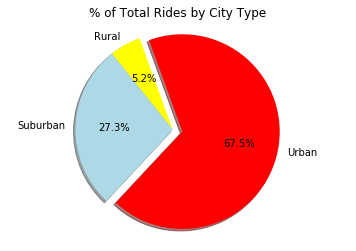

In [17]:
plt.show()

# Total Drivers by City Type

In [21]:
#calculating the # of drivers by city type urban, suburban and rural
type_drivers = city_data_df.groupby('type').sum()

#calculating the total number of drivers
total_drivers = type_drivers['driver_count'].sum()

#calculating the % of drivers by city type
percent_drivers = (type_drivers/total_drivers)

# Lables
labels = type_drivers.index

# Sizes
sizes = percent_drivers

# Colors
colors = ['yellow', 'lightblue', 'red']

# Explode
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=110)
plt.title("% of Total Drivers by City Type")

Text(0.5,1,'% of Total Drivers by City Type')

In [22]:
plt.axis("equal")

(-1.1251543814101894,
 1.1971251902322646,
 -1.1554481375087537,
 1.0537228477131089)

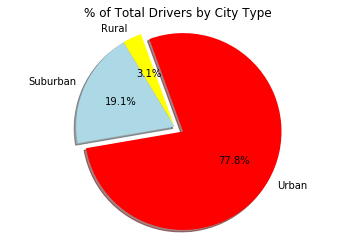

In [23]:
plt.show()